In [ ]:
#Convolution Neural Networks
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
#Accessing dataset
from tensorflow.keras.datasets.fashion_mnist import load_data
(X_train,y_train),(X_test,y_test)=load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

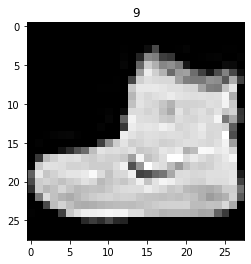

In [ ]:
#Visualisation
plt.imshow(X_train[0],'gray')
plt.title(y_train[0]);

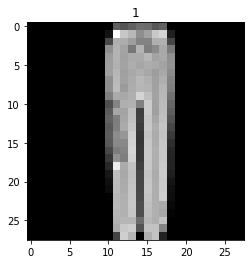

In [ ]:
plt.imshow(X_train[1000],'gray')
plt.title(y_train[1000]);

In [ ]:
#Normalisation
normalizer=tf.keras.layers.Normalization()
normalizer.adapt(X_train)
normalizer.adapt(X_test)
X_train=normalizer(X_train)
X_test=normalizer(X_test)

In [ ]:
X_train[0]

<tf.Tensor: shape=(28, 28), dtype=float32, numpy=
array([[-1.66705310e-01, -2.37610102e-01, -2.88022250e-01,
        -3.77576619e-01, -5.25583744e-01, -6.52512431e-01,
        -7.35818923e-01, -8.08604360e-01, -9.32654202e-01,
        -1.10508120e+00, -1.26358020e+00, -1.33893907e+00,
        -1.35849750e+00, -1.31519282e+00, -1.28405118e+00,
        -1.40120041e+00, -1.45473456e+00, -1.42187226e+00,
        -1.31178093e+00, -1.12539494e+00, -9.59526122e-01,
        -8.73693526e-01, -8.07175994e-01, -7.09105551e-01,
        -5.77009022e-01, -4.72885549e-01, -3.83872122e-01,
        -2.41619453e-01],
       [-1.66705310e-01, -2.37610102e-01, -2.88022250e-01,
        -3.77576619e-01, -5.25583744e-01, -6.52512431e-01,
        -7.35818923e-01, -8.08604360e-01, -9.32654202e-01,
        -1.10508120e+00, -1.26358020e+00, -1.33893907e+00,
        -1.35849750e+00, -1.31519282e+00, -1.28405118e+00,
        -1.40120041e+00, -1.45473456e+00, -1.42187226e+00,
        -1.31178093e+00, -1.12539494e+0

In [ ]:
#Building the model
model=tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
#Flatten
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(50,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

Epoch 1/2
1875/1875 [==============================] - 501s 266ms/step - loss: 0.4654 - accuracy: 0.8280
Epoch 2/2
1875/1875 [==============================] - 485s 259ms/step - loss: 0.2878 - accuracy: 0.8955


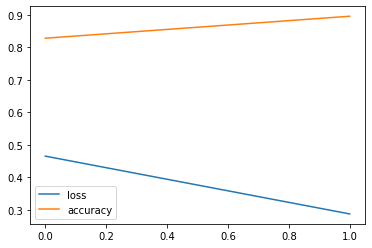

In [ ]:
tf.random.set_seed(100)
hist=model.fit(X_train,y_train,epochs=2)
pd.DataFrame(hist.history).plot();#60000/32